In [236]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/time-series-datasets/test1.csv
/kaggle/input/time-series-datasets/train1.csv


In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from datetime import datetime


In [238]:

train_data = pd.read_csv('/kaggle/input/time-series-datasets/train1.csv')
test_data = pd.read_csv('/kaggle/input/time-series-datasets/test1.csv')


train_data['date'] = pd.to_datetime(train_data['date'], format='%d-%m-%Y')
test_data['date'] = pd.to_datetime(test_data['date'], format='%d-%m-%Y')

train_data = train_data.sort_values(by='date')


In [239]:
train_data.head()

,date,price
0,2014-01-01,9
1,2014-01-02,14
2,2014-01-03,11
3,2014-01-04,20
4,2014-01-05,17


In [240]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369 entries, 0 to 1368
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1369 non-null   datetime64[ns]
 1   price   1369 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 21.5 KB


In [241]:
mean_price = train_data['price'].mean()
variance_price = train_data['price'].var() 
median_price = train_data['price'].median()

print(f"Mean: {mean_price}")
print(f"Variance: {variance_price}")
print(f"Median: {median_price}")

Mean: 20.87801314828342
Variance: 46.06186271620127
Median: 20.0


In [242]:

print(train_data.isnull().sum())

# NO imputation or interpolation required here 


date     0
price    0
dtype: int64


In [243]:
train_data['year'] = train_data['date'].dt.year
train_data['month'] = train_data['date'].dt.month
train_data['day'] = train_data['date'].dt.day
train_data['is_weekday'] = train_data['date'].dt.dayofweek
train_data['is_weekend'] = train_data['is_weekday'].apply(lambda x: 1 if x >= 5 else 0)



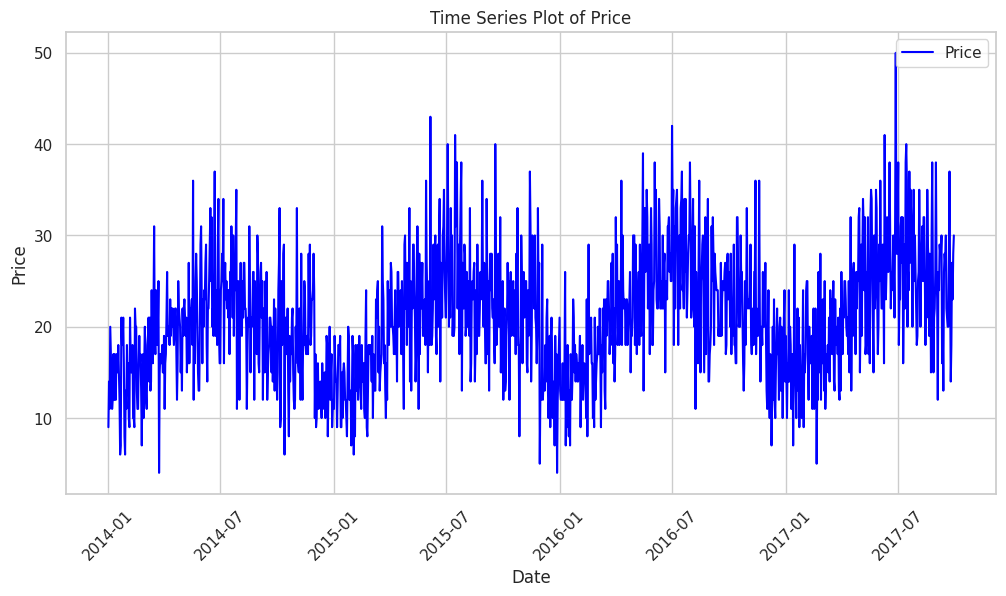

/tmp/ipykernel_24/2131546543.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='year', y='price', data=train_data, estimator='mean', ci=None)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


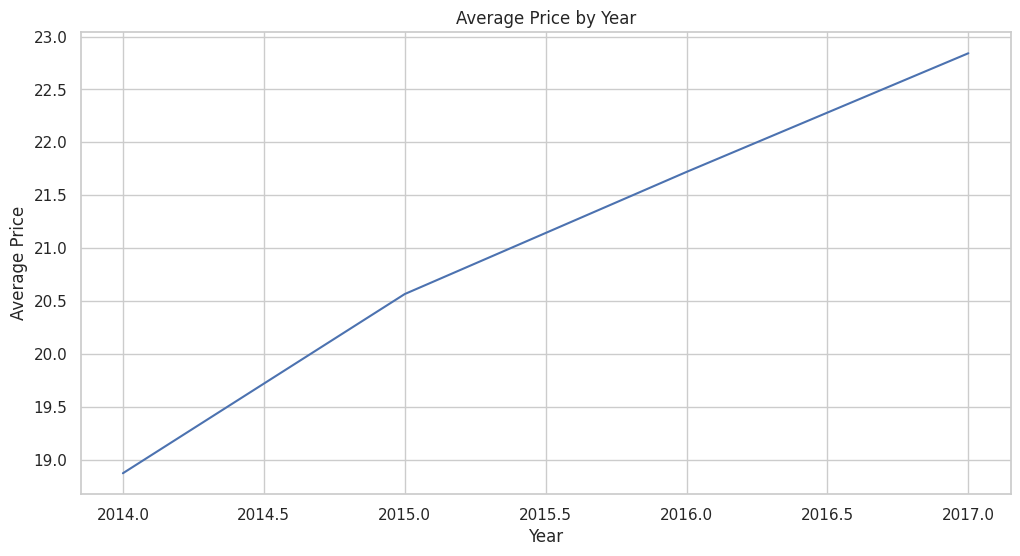

/tmp/ipykernel_24/2131546543.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='price', data=train_data, estimator='mean', ci=None)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


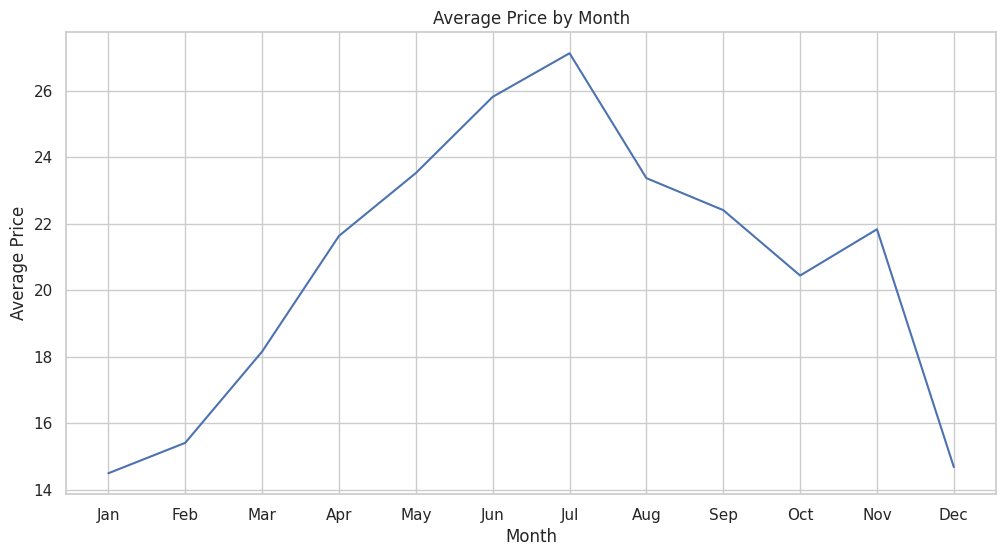

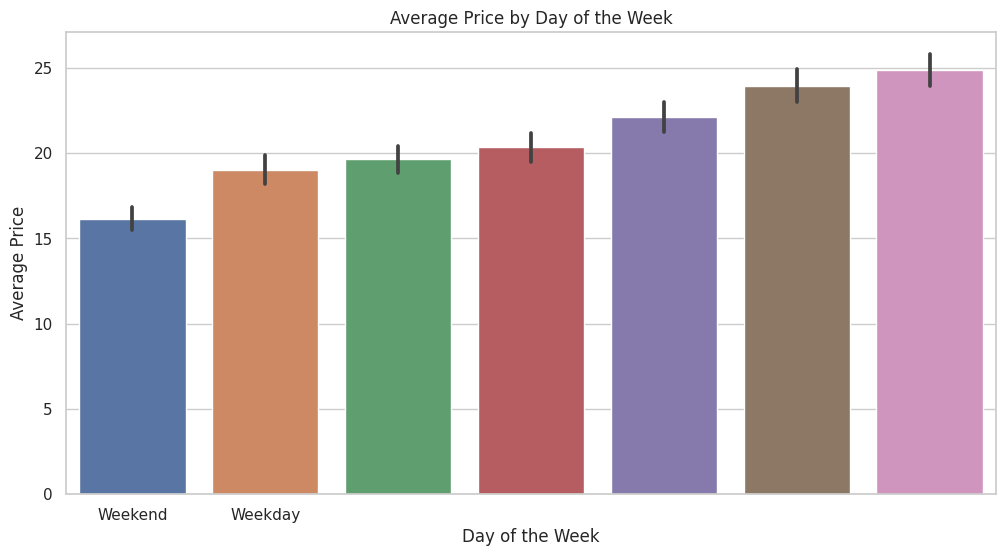

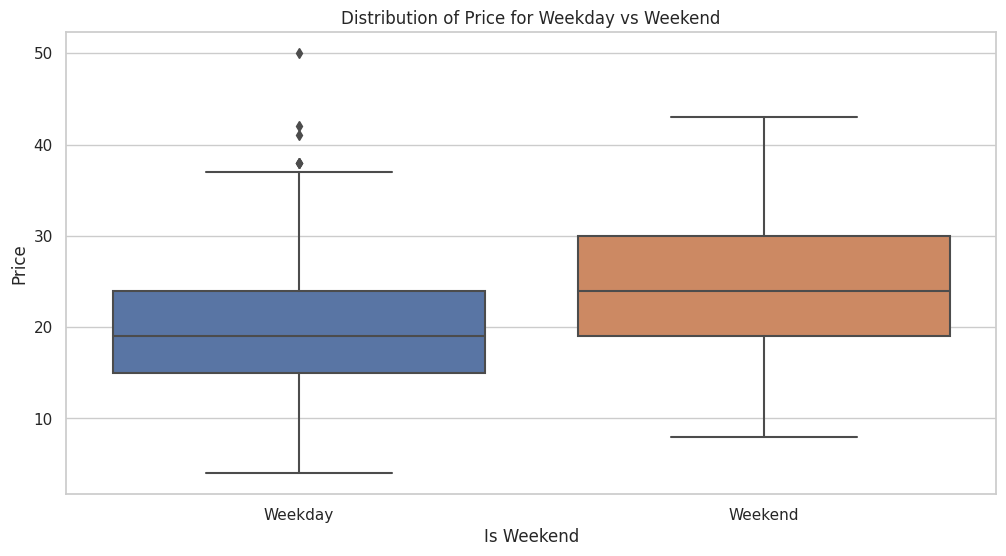

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
plt.plot(train_data['date'], train_data['price'], label='Price', color='blue')
plt.title('Time Series Plot of Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='price', data=train_data, estimator='mean', ci=None)
plt.title('Average Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()


plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='price', data=train_data, estimator='mean', ci=None)
plt.title('Average Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


plt.figure(figsize=(12, 6))
sns.barplot(x='is_weekday', y='price', data=train_data, estimator='mean')
plt.title('Average Price by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Price')
plt.xticks(ticks=[0, 1], labels=['Weekend', 'Weekday'])
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(x='is_weekend', y='price', data=train_data)
plt.title('Distribution of Price for Weekday vs Weekend')
plt.xlabel('Is Weekend')
plt.ylabel('Price')
plt.xticks(ticks=[0, 1], labels=['Weekday', 'Weekend'])
plt.show()


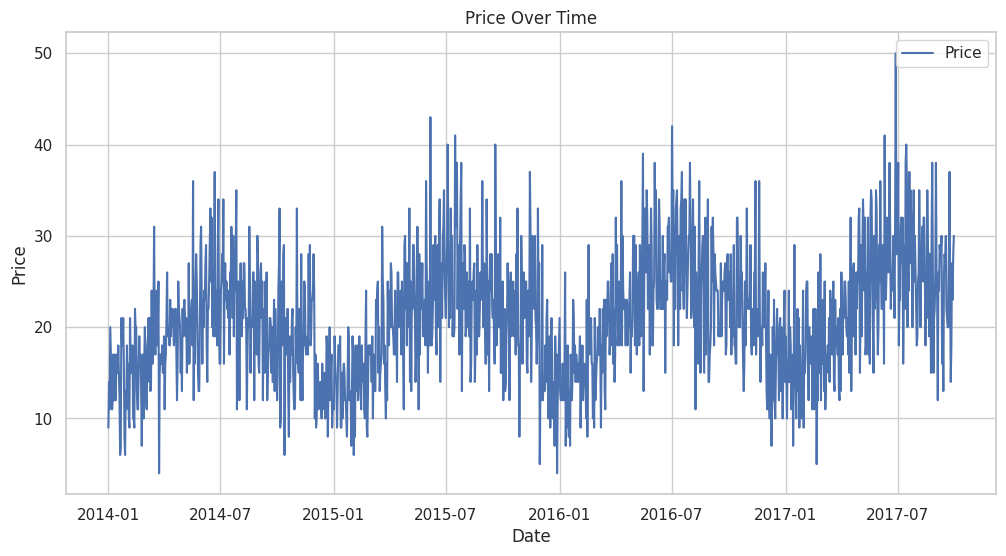

In [245]:
plt.figure(figsize=(12, 6))
plt.plot(train_data['date'], train_data['price'], label='Price')
plt.title('Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


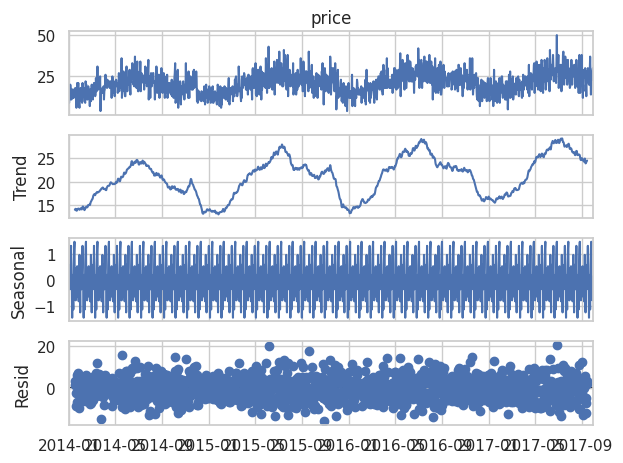

In [246]:
decompose_result = seasonal_decompose(train_data.set_index('date')['price'], model='additive', period=30)


decompose_result.plot()
plt.show()


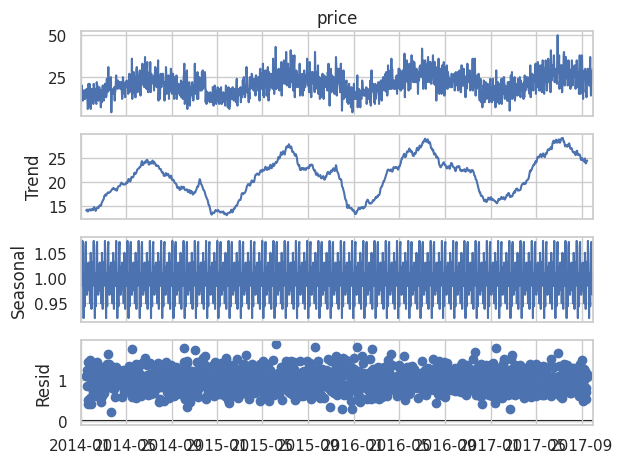

In [247]:
decompose_result = seasonal_decompose(train_data.set_index('date')['price'], model='multiplicative', period=30)

decompose_result.plot()
plt.show()

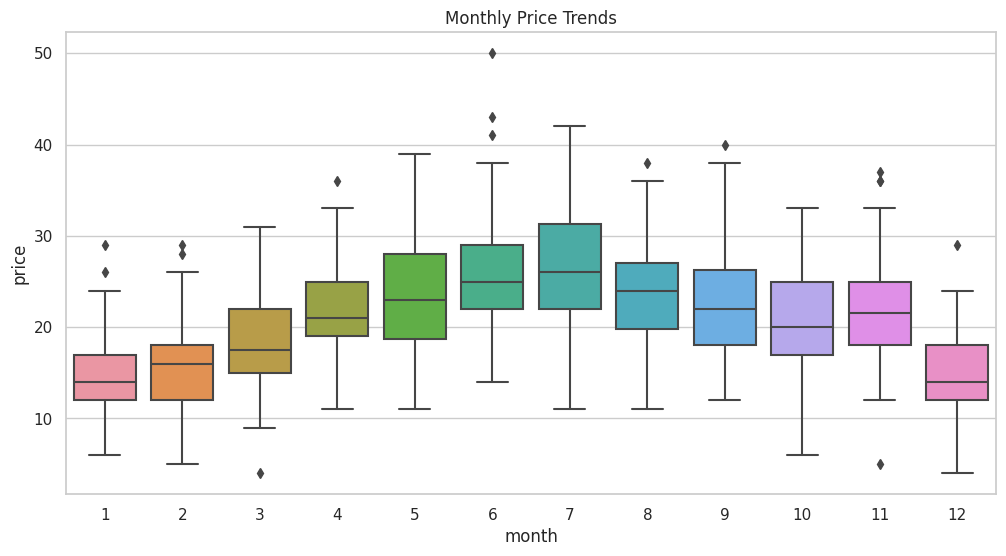

In [248]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='price', data=train_data)
plt.title('Monthly Price Trends')
plt.show()


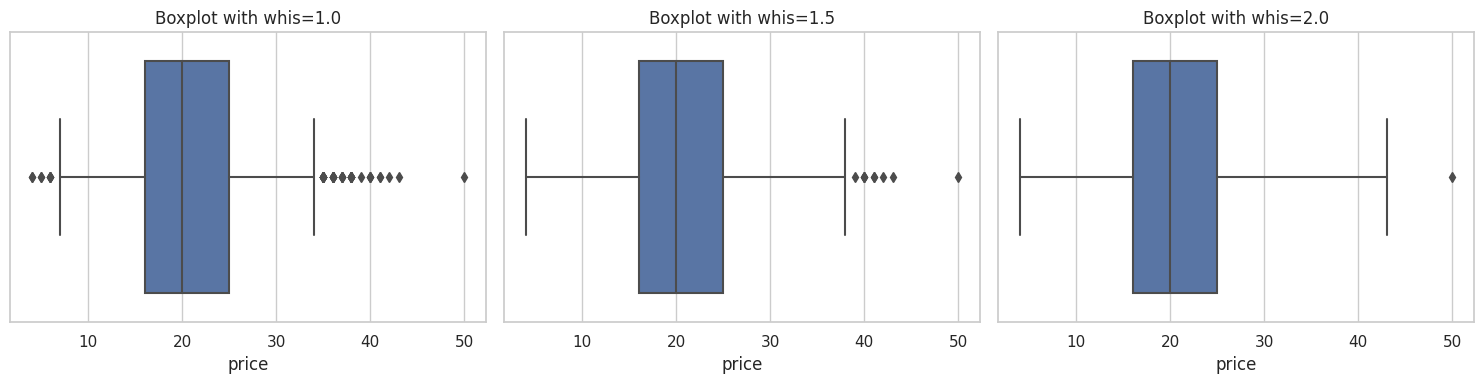

In [249]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, whis in zip(axes, [1.0, 1.5, 2.0]):
    sns.boxplot(x=train_data['price'], whis=whis, ax=ax)
    ax.set_title(f'Boxplot with whis={whis}')


plt.tight_layout()
plt.show()


In [250]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train_data['price'])
print('Adf Statistic:', result[0])
print('p-value:', result[1])

# differencing 

if result[1] > 0.05:
    train_data['price_diff'] = train_data['price'].diff()
    train_data = train_data.dropna()

Adf Statistic: -2.3886947413503266
p-value: 0.14495269098248575


In [251]:

train, val = train_test_split(train_data, test_size=0.2, shuffle=False)
# splitting into training and validation data

train = train.sort_values(by='date')
val = val.sort_values(by='date')


Models

In [252]:
from statsmodels.tsa.arima.model import ARIMA


arima_model = ARIMA(train['price'], order=(3, 0, 3))
arima_result = arima_model.fit()

val_predictions = arima_result.forecast(steps=len(val))

rmse = np.sqrt(mean_squared_error(val['price'], val_predictions))
print('ARIMA Validation RMSE:', rmse)


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

ARIMA Validation RMSE: 7.775971555412792


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [253]:
from scipy.stats import boxcox
import pandas as pd

correct_data = train_data['price'][train_data['price'] > 0]

boxcox_data, opt_lambda = boxcox(correct_data, lmbda=None)

print(f"Optimal Lambda: {opt_lambda}")

boxcox_data_series = pd.Series(boxcox_data, index=correct_data.index)

print(boxcox_data_series.head())

Optimal Lambda: 0.5969562372742344
1    6.420375
2    5.334922
3    8.341323
4    7.415207
5    6.420375
dtype: float64


In [254]:
from scipy.stats import boxcox
boxcox_data = pd.Series(boxcox(train_data['price'], lmbda=0), train_data.index)
boxcox_data.head()
boxcox_data_difference = pd.Series(boxcox_data - boxcox_data.shift(), index=train_data.index)
boxcox_data_difference.dropna(inplace=True)

In [255]:
training_data = 1100

In [256]:
train_data_boxcox_difference= boxcox_data_difference[:training_data]
test_data_boxcox_difference = boxcox_data_difference[training_data:]

In [257]:
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

def reverse_boxcox(boxcox_data, lambda_value):
    return inv_boxcox(boxcox_data, lambda_value)

def check_stationarity(data):
    result = adfuller(data)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])
    
    if result[1] < 0.05:
        print("The series is stationary")
    else:
        print("The series is not stationary")
    return result[1]


p_value = check_stationarity(train_data_boxcox_difference)


if p_value < 0.05:
    model = ARIMA(train_data_boxcox_difference, order=(3, 0, 3)) 
    results = model.fit()

    f_boxcox = results.forecast(steps=len(test_data_boxcox_difference))

    f_boxcox = np.array(f_boxcox).flatten()

    lambda_value = 0

    f_reversed = reverse_boxcox(f_boxcox, lambda_value)
    actual_reversed = reverse_boxcox(test_data_boxcox_difference, lambda_value)

    rmse = np.sqrt(mean_squared_error(actual_reversed, f_reversed))

    non_zero_indices = actual_reversed != 0 
    actual_non_zero = actual_reversed[non_zero_indices]

    mape = np.mean(np.abs((actual_reversed - f_reversed) / actual_reversed)) * 100

    print(f"ARIMA Validation RMSE: {rmse}")
    print(f"ARIMA Validation MAPE: {mape}%")
else:
    print("The series is not stationary")


ADF Statistic: -12.61533228324193
p-value: 1.6215646158587547e-23
Critical Values: {'1%': -3.435903883450231, '5%': -2.863992471942117, '10%': -2.5680757461936223}
The series is stationary


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA Validation RMSE: 0.3584306726652704
ARIMA Validation MAPE: 27.64967777421%


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


06:25:23 - cmdstanpy - INFO - Chain [1] start processing
06:25:24 - cmdstanpy - INFO - Chain [1] done processing


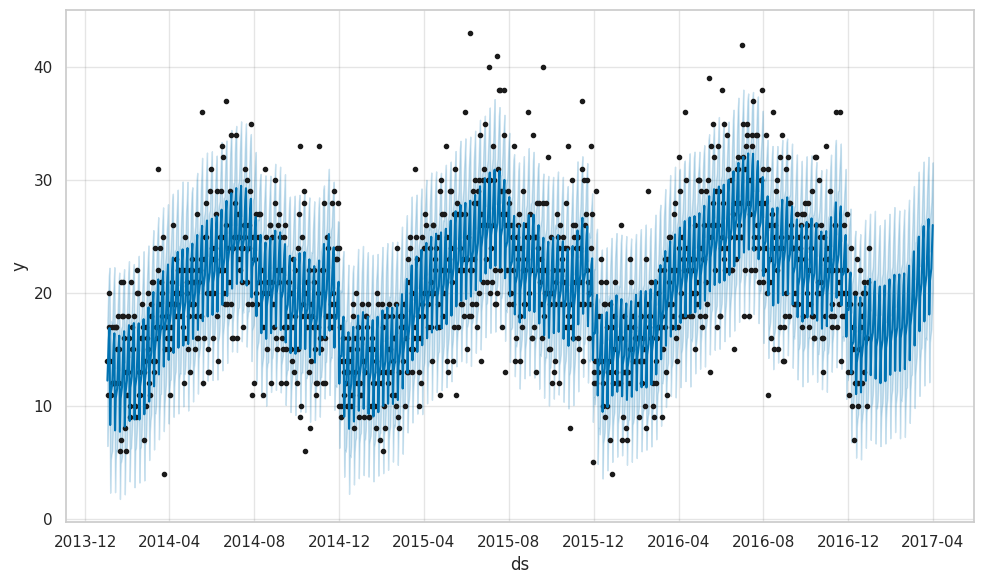

In [258]:
from prophet import Prophet


prophet_train = train[['date', 'price']].rename(columns={'date': 'ds', 'price': 'y'})


prophet_model = Prophet()
prophet_model.fit(prophet_train)

future = prophet_model.make_future_dataframe(periods=len(test_data))
forecast = prophet_model.predict(future)


prophet_model.plot(forecast)
plt.show()


In [259]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from sklearn.model_selection import train_test_split


train, val = train_test_split(train_data, test_size=0.2, shuffle=False)


scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train[['price']])
val_scaled = scaler.transform(val[['price']])


X_train, y_train = [], []
for i in range(60, len(train_scaled)):
    X_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)) 


model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10, batch_size=32)


X_val, y_val = [], []
for i in range(60, len(val_scaled)):
    X_val.append(val_scaled[i-60:i, 0])
    y_val.append(val_scaled[i, 0]) 

X_val, y_val = np.array(X_val), np.array(y_val)
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))


val_predictions = model.predict(X_val)
val_predictions = scaler.inverse_transform(val_predictions)


val_actual = scaler.inverse_transform(y_val.reshape(-1, 1))  

val_accuracy = 1 - np.mean(np.abs((val_actual - val_predictions) / val_actual))

train_predictions = model.predict(X_train)
train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1)) 

train_actual = scaler.inverse_transform(y_train.reshape(-1, 1)) 

train_accuracy = 1 - np.mean(np.abs((train_actual - train_predictions) / train_actual))

print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")








Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0697
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0226
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0222
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0212
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0213
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0191
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0232
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0221
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0204
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0222
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
Train Accuracy: 76.08%
Validation Accuracy: 79.29%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

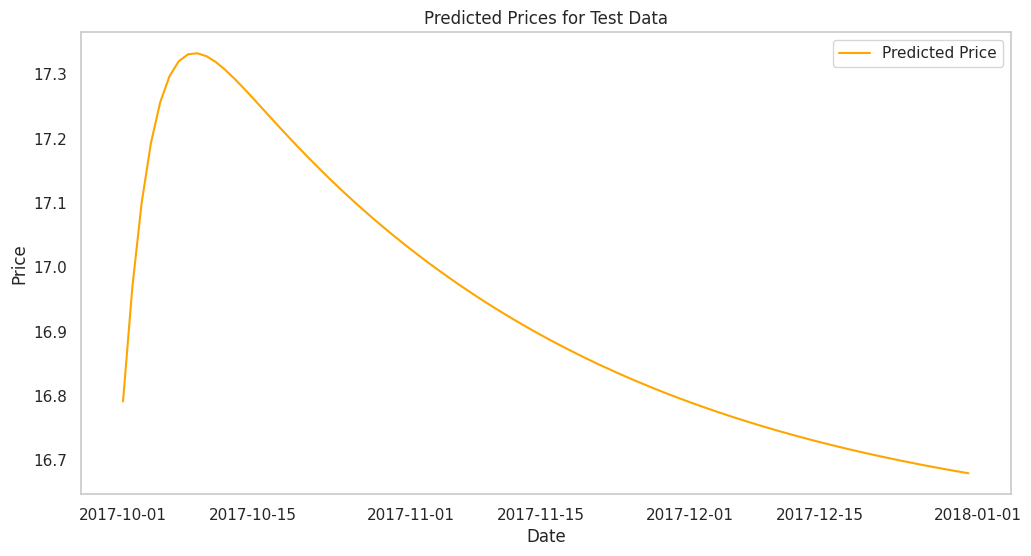

In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model

predicted_prices = []
input_sequence = train_scaled[-60:].flatten().tolist() 

for _ in range(len(test_data)):

    current_input = np.array(input_sequence[-60:]).reshape((1, 60, 1))
    next_prediction = model.predict(current_input)[0, 0]
    
    predicted_prices.append(next_prediction)
    
    input_sequence.append(next_prediction)


predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1)).flatten()

test_data['predicted_price'] = predicted_prices


test_data.to_csv('output.csv', index=False)

print("Predictions saved to 'output.csv'")


plt.figure(figsize=(12, 6))
plt.plot(test_data['date'], test_data['predicted_price'], label='Predicted Price', color='orange')
plt.title('Predicted Prices for Test Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

